# Fake news classifier using different algorithms
- <b>trainning on : title and author</b>
- tfidf vectorizer and gri _searchCV
1. MultinomialNB(vanilla and with tuning)
2. assiveAggressiveClassifier(vanilla and with tuning)
3. LogisticRegression
*source: https://www.kaggle.com/c/fake-news/data

In [1]:
### importing and loading

In [2]:
#import os
#import sys
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt

import re 
from nltk.corpus import stopwords 

from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

from sklearn.model_selection import train_test_split 

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [3]:
df=pd.read_csv('train.csv')
df= df.drop(columns='id', axis=1) # id column is not necessary
display(df.head(3))

,title,author,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1


##### Note: 1 means Fake news,0 means not Fake news

### Data Analysis

In [4]:
print('shape', df.shape)
print(df.info())

shape (20800, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   20242 non-null  object
 1   author  18843 non-null  object
 2   text    20761 non-null  object
 3   label   20800 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 650.1+ KB
None


In [5]:
# null value check
df.isnull().sum()

title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
# missing = df.title.mean( )
# data = df.dropna(subset=['title'])
# print(data)
# data = data[data['title'].notnull()]
# print(data)
data =df.dropna(axis=0, subset=('title', ))
print(data)

## making new data frame with dropped NA values
# new_data = df.dropna(axis = 0, how ='title')
  
# # comparing sizes of data frames
# print("Old data frame length:", len(data), "\nNew data frame length:", 
#        len(new_data), "\nNumber of rows with at least 1 NA value: ",
#        (len(data)-len(new_data)))

                                                   title  \
0      House Dem Aide: We Didn’t Even See Comey’s Let...   
1      FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2                      Why the Truth Might Get You Fired   
3      15 Civilians Killed In Single US Airstrike Hav...   
4      Iranian woman jailed for fictional unpublished...   
...                                                  ...   
20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                  

In [7]:
# Replacing the null values with emtpy strings 
df = df.fillna('')
df.isnull().sum()

title     0
author    0
text      0
label     0
dtype: int64

### Text preprocessing- on 'author' and 'title' column


In [8]:
#merging the author name and news title and make a new column
df['content'] = df['author']+' '+df['title']
df['content']

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object

### Now we will separate the data and label

In [9]:
#X = df.drop(columns='label', axis=1)
X=df['content']
Y = df['label']
display(X.head())
print(Y.head())

0    Darrell Lucus House Dem Aide: We Didn’t Even S...
1    Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2    Consortiumnews.com Why the Truth Might Get You...
3    Jessica Purkiss 15 Civilians Killed In Single ...
4    Howard Portnoy Iranian woman jailed for fictio...
Name: content, dtype: object

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64


#### Stemming and other preprocessing

In [10]:
#take 5000 rows from df
#df=df[:1000]
#df.head()
df.shape
#df['text']

(20800, 5)

In [11]:
# stemming 
ps = PorterStemmer()
# corpus = []
# for i in range(0, len(df)):
#     review = re.sub('[^a-zA-Z]', ' ', df['content'][i]) # only the content column
#     review = review.lower()
#     review = review.split()
    
#     review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
#     review = ' '.join(review)
#     corpus.append(review)

def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content
    
    
df['content'] = df['content'].apply(stemming)

In [12]:
df['content'][:5]
#df.head()

0    darrel lucu hous dem aid even see comey letter...
1    daniel j flynn flynn hillari clinton big woman...
2               consortiumnew com truth might get fire
3    jessica purkiss civilian kill singl us airstri...
4    howard portnoy iranian woman jail fiction unpu...
Name: content, dtype: object

In [13]:
# Separating data and label
X = df['content'].values
y = df['label'].values
X

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

#### TfidfVectorizer

In [14]:
 # i want to take 5000 feayures and (1,3) means features will be single,double or triple word
tf= TfidfVectorizer(max_features=5000,ngram_range=(1,3)) 
X=tf.fit_transform(df['content']).toarray()
print(X.shape)
print(X)

(20800, 5000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### check features

In [15]:
tf.get_feature_names()[:10] # first 10 features

['aaron',
 'aaron carrol',
 'aaron kesel',
 'aaron klein',
 'aaron klein ali',
 'abandon',
 'abbi',
 'abbi goodnough',
 'abc',
 'abduct']

In [16]:
tf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

### Train test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
count_df = pd.DataFrame(X, columns=tf.get_feature_names())
count_df.head()

,aaron,aaron carrol,aaron kesel,aaron klein,aaron klein ali,abandon,abbi,abbi goodnough,abc,abduct,...,zika,zika viru,zionist,zone,zraick,zraick sandra,zraick sandra stevenson,zu,zuckerberg,zuess
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Algorithms

#### 1. Multinomial NB

MNB accuracy_score 0.9632211538461538


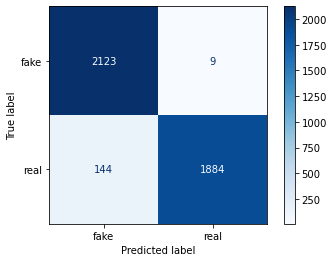

In [19]:
clf=MultinomialNB()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
MNB_accuracy=metrics.accuracy_score(y_test,pred)
print('MNB accuracy_score',MNB_accuracy)

plot_confusion_matrix(clf,X_test,y_test,display_labels=['fake','real'],cmap='Blues')
plt.show()

#### 1.1 multinomialNB with hyperparameter

In [20]:
alpha=[0.01, 0.1, 0.5, 1.0, 10.0, ]
parameters={'alpha': alpha }

clf_gs=MultinomialNB()

gscv=GridSearchCV(estimator=clf_gs,
                 param_grid=parameters,
                 scoring='accuracy',
                 cv=5,
                 n_jobs=-1)

gscv=gscv.fit(X_train,y_train)
gscv
         

GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]},
             scoring='accuracy')

In [21]:
gscv.best_params_

{'alpha': 1.0}

Accuracy_tuning 0.9632211538461538


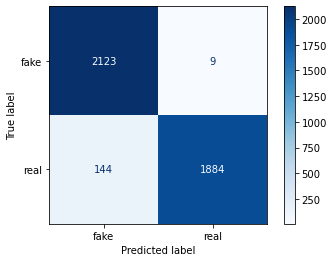

In [22]:
y_pred_gs =gscv.predict(X_test) 
MNB_t_accuracy=metrics.accuracy_score(y_test,y_pred_gs)
print('Accuracy_tuning',MNB_t_accuracy)

plot_confusion_matrix(gscv,X_test,y_test,display_labels=['fake','real'],cmap='Blues')
plt.show()


#### 2. passive aggresive classifier algorithm

F:\software\anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


Passive_agg_accuracy_score 0.9932692307692308


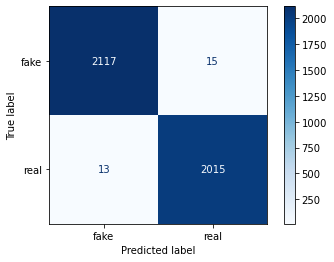

In [23]:
clf = PassiveAggressiveClassifier(max_iter=10,random_state=42)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
pass_agg=metrics.accuracy_score(y_test,pred)
print('Passive_agg_accuracy_score',pass_agg)

plot_confusion_matrix(clf,X_test,y_test,display_labels=['fake','real'],cmap='Blues')
plt.show()

#### 2.1 with tuning

In [24]:
max_iter=[50,100,200]
shuffle=[True]
random_state=[42]

parameters={'max_iter': max_iter,
           'shuffle':shuffle,
           'random_state':random_state}

clf_gs=PassiveAggressiveClassifier()

gscv=GridSearchCV(estimator=clf_gs,
                 param_grid=parameters,
                 scoring='accuracy',
                 cv=5,
                 n_jobs=-1)

gscv2=gscv.fit(X_train,y_train)
gscv2
         

GridSearchCV(cv=5, estimator=PassiveAggressiveClassifier(), n_jobs=-1,
             param_grid={'max_iter': [50, 100, 200], 'random_state': [42],
                         'shuffle': [True]},
             scoring='accuracy')

In [25]:
gscv2.best_params_

{'max_iter': 50, 'random_state': 42, 'shuffle': True}

Accuracy_with_tuning 0.9932692307692308


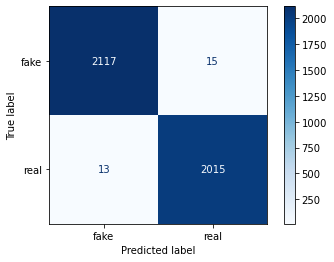

In [26]:
y_pred_gs =gscv2.predict(X_test) 
pass_agg_t=metrics.accuracy_score(y_test,y_pred_gs)
print('Accuracy_with_tuning',pass_agg_t)

plot_confusion_matrix(gscv,X_test,y_test,display_labels=['fake','real'],cmap='Blues')
plt.show()


#### 3. Logistic regression algorithm

logistic reg. accuracy_score 0.9836538461538461


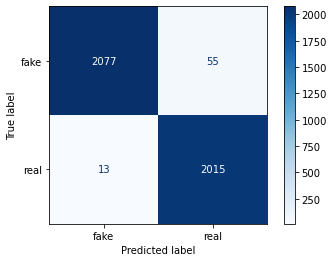

In [27]:
clf_log= LogisticRegression()

clf_log.fit(X_train,y_train)
pred=clf_log.predict(X_test)
log_r_accuracy=metrics.accuracy_score(y_test,pred)
print('logistic reg. accuracy_score',log_r_accuracy)

plot_confusion_matrix(clf_log,X_test,y_test,display_labels=['fake','real'],cmap='Blues')
plt.show()

In [28]:
# Support Vector Classification :

from sklearn.svm import SVC
SvcModel=SVC( )
SvcModel.fit(X_train,y_train)
pred=SvcModel.predict(X_test)
SVCmodel=metrics.accuracy_score(y_test,pred)
print('SVCmodel accuracy_score: ',SVCmodel)
# SvcModel.metrics.accuracy_score(X_test,y_test)

SVCmodel accuracy_score:  0.9915865384615384


RandomForestClassifier:

In [29]:
from sklearn.ensemble import RandomForestClassifier
Rfcl = RandomForestClassifier()
Rfcl.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
pred1=Rfcl.predict(X_test)
RFCLmodel = metrics.accuracy_score(y_test,pred1)
print('RFCLmodel accuracy_score: ',RFCLmodel)

RFCLmodel accuracy_score:  0.9923076923076923


5 . DecisionTreeClassifier:

In [31]:

from sklearn.tree import DecisionTreeClassifier
Dtc=DecisionTreeClassifier( )
Dtc.fit(X_train,y_train)
pred=Dtc.predict(X_test)
DTCmodel = metrics.accuracy_score(y_test,pred)
print('DTCmodel accuracy_score: ',DTCmodel)

DTCmodel accuracy_score:  0.9923076923076923


 6 . K-Nearest Neighbors Algorithm :

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
pred_KNN=classifier.predict(X_test)
KNNmodel = metrics.accuracy_score(y_test,pred_KNN)
print('KNNmodel accuracy_score: ',KNNmodel)

KNNmodel accuracy_score:  0.6257211538461539


### comparioson

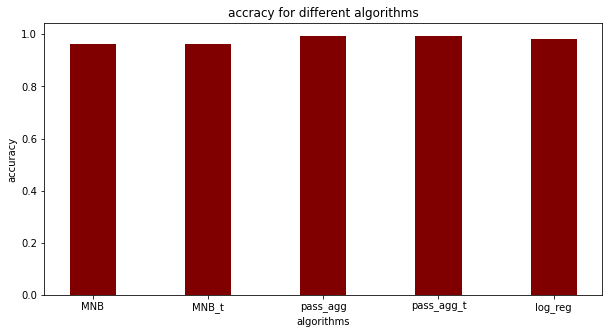

MNB_accuracy 0.9632211538461538
MNB_t_accuracy 0.9632211538461538
pass_agg_accuracy 0.9932692307692308
pass_agg_t 0.9932692307692308
log_reg 0.9836538461538461


In [33]:
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'MNB':MNB_accuracy, 'MNB_t':MNB_t_accuracy, 'pass_agg':pass_agg,
        'pass_agg_t':pass_agg_t,'log_reg':log_r_accuracy}
algos = list(data.keys())
accuracy = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(algos, accuracy, color ='maroon',
        width = 0.4)
 
plt.xlabel("algorithms")
plt.ylabel("accuracy")
plt.title("accracy for different algorithms")
plt.show()
 
    
print('MNB_accuracy',MNB_accuracy)
print('MNB_t_accuracy',MNB_t_accuracy)
print('pass_agg_accuracy',pass_agg)
print('pass_agg_t',pass_agg_t)
print('log_reg',log_r_accuracy)

#### Note: passive aggrassive algorithm works best

In [1]:
X_new = X_test[[150]]

prediction = clf.predict(X_new)
print(prediction)

if (prediction[0] == 0):
  print('The news in Real')
else:
  print('The news is Fake and Unreliable')

NameError: name 'X_test' is not defined

In [35]:
#save model
import pickle 
filename= 'finalized_model.pkl'
pickle.dump(clf_log, open(filename,  'wb'))

In [36]:
# save vectorizer
import pickle
filename = 'vectorizer.pkl'
pickle.dump(tf, open(filename,'wb'))